## New York Police Deparment (NYPD) Arrest Data

In this notebook, I analyzed a set of NYPD data from NYC Open Data website. I performed some exploratory data analysis, cleaned the data, ran some statisticals analysis and created a visualization. 

In [1]:
#importing all libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading data set to a df
df = pd.read_csv("NYPD_Arrest_Data__Year_to_Date__20240501.csv")

In [3]:
#Viewing the first 10 rows
df.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)
5,281488967,02/01/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,113,0,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
6,280769124,01/19/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,M,M,6,0,25-44,M,BLACK,984134,207984,40.737547,-74.000415,POINT (-74.000415 40.737547)
7,281338081,01/30/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,26,0,25-44,M,BLACK,996014,236126,40.814780,-73.957499,POINT (-73.957499 40.81478)
8,280961365,01/23/2024,NaN,(null),NaN,(null),(null),(null),M,5,97,25-44,M,BLACK,983903,200257,40.716337,-74.001251,POINT (-74.001251 40.716337)
9,281426006,01/31/2024,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,B,41,0,18-24,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)


In [4]:
# Identifing how many rows and columns
df.shape

(63621, 19)

In [5]:
#Viewing the column names to copy and paste for cleaning/analysis
df.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [6]:
#see the count of non-null values and data types for each column.
#field interested on:  A1Cresult 17018 non-null   object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63621 entries, 0 to 63620
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ARREST_KEY                63621 non-null  int64  
 1   ARREST_DATE               63621 non-null  object 
 2   PD_CD                     63619 non-null  float64
 3   PD_DESC                   63621 non-null  object 
 4   KY_CD                     63612 non-null  float64
 5   OFNS_DESC                 63621 non-null  object 
 6   LAW_CODE                  63621 non-null  object 
 7   LAW_CAT_CD                63219 non-null  object 
 8   ARREST_BORO               63621 non-null  object 
 9   ARREST_PRECINCT           63621 non-null  int64  
 10  JURISDICTION_CODE         63621 non-null  int64  
 11  AGE_GROUP                 63621 non-null  object 
 12  PERP_SEX                  63621 non-null  object 
 13  PERP_RACE                 63621 non-null  object 
 14  X_COOR

In [7]:
#convert col with object data types  to string - created for loop and print datatype for each to confirm
object_list = ['ARREST_DATE','LAW_CAT_CD','ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']
for col in object_list: 
    df[col] = df[col].astype("string")
    print(col + ' data type: ')
    print(df[col].dtype)

ARREST_DATE data type: 
string
LAW_CAT_CD data type: 
string
ARREST_BORO data type: 
string
AGE_GROUP data type: 
string
PERP_SEX data type: 
string
PERP_RACE data type: 
string


In [8]:
#unique values in the weight column
#df['PD_DESC'].unique()
df['ARREST_DATE'].unique()


<StringArray>
['01/10/2024', '01/02/2024', '01/03/2024', '01/19/2024', '01/11/2024',
 '02/01/2024', '01/30/2024', '01/23/2024', '01/31/2024', '02/03/2024',
 '01/26/2024', '02/07/2024', '02/02/2024', '02/15/2024', '02/20/2024',
 '02/19/2024', '02/29/2024', '03/16/2024', '03/04/2024', '03/18/2024',
 '03/06/2024', '01/08/2024', '01/13/2024', '01/22/2024', '01/28/2024',
 '01/27/2024', '01/29/2024', '01/12/2024', '01/25/2024', '01/01/2024',
 '01/09/2024', '01/24/2024', '01/17/2024', '01/20/2024', '01/04/2024',
 '01/05/2024', '01/06/2024', '01/15/2024', '01/14/2024', '01/21/2024',
 '01/18/2024', '01/07/2024', '02/08/2024', '02/05/2024', '02/06/2024',
 '01/16/2024', '02/10/2024', '02/04/2024', '02/16/2024', '02/09/2024',
 '02/11/2024', '02/13/2024', '02/12/2024', '02/18/2024', '02/14/2024',
 '02/17/2024', '02/25/2024', '03/03/2024', '03/12/2024', '02/24/2024',
 '03/01/2024', '02/28/2024', '02/21/2024', '02/23/2024', '03/09/2024',
 '02/27/2024', '02/22/2024', '03/11/2024', '03/08/2024', '03/19

In [9]:
#created for loop to print unique values of interested columns in list 
col_list = ['LAW_CAT_CD','ARREST_BORO', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']
for col in col_list: 
    print(col.upper() + " Unique Values: ")
    print(df[col].unique())
    print(" ")

    #BORO: B(BRONX), S(STATEN ISLAND), K(BROOKLYN), Q(QUEENS)
   

LAW_CAT_CD Unique Values: 
<StringArray>
['F', 'M', '(null)', 'V', '9', <NA>, 'I']
Length: 7, dtype: string
 
ARREST_BORO Unique Values: 
<StringArray>
['M', 'K', 'Q', 'B', 'S']
Length: 5, dtype: string
 
AGE_GROUP Unique Values: 
<StringArray>
['<18', '25-44', '65+', '45-64', '18-24']
Length: 5, dtype: string
 
PERP_SEX Unique Values: 
<StringArray>
['M', 'F']
Length: 2, dtype: string
 
PERP_RACE Unique Values: 
<StringArray>
[                         'BLACK',                 'WHITE HISPANIC',
                          'WHITE',       'ASIAN / PACIFIC ISLANDER',
                        'UNKNOWN',                 'BLACK HISPANIC',
 'AMERICAN INDIAN/ALASKAN NATIVE']
Length: 7, dtype: string
 


In [10]:
#replacing borough codes with  borough names
df['ARREST_BORO'] = df['ARREST_BORO'].map({'M': 'Manhattan', 'K': 'Brooklyn', 'Q': 'Queens', 'B': 'Bronx', 'S': 'Staten Island'})

#replacing lAW_CAT_CD: F(FELONY), M(MISDEMEANOR), I(INFRACTION),V(VIOLATION), 9(CANNABIS POSSESSIONS/UNCLASSIFIED VIO)
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].map({'F': 'Felony', 'M': 'Misdemeanor', 'I': 'Infraction', 'V': 'Violation', '9': 'Cannabis Possesions/Unclassified Vio,'})

#view df
df.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,Felony,Manhattan,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,Felony,Brooklyn,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Queens,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,Misdemeanor,Bronx,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,Felony,Brooklyn,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)
5,281488967,02/01/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,Felony,Queens,113,0,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
6,280769124,01/19/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,Misdemeanor,Manhattan,6,0,25-44,M,BLACK,984134,207984,40.737547,-74.000415,POINT (-74.000415 40.737547)
7,281338081,01/30/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Manhattan,26,0,25-44,M,BLACK,996014,236126,40.814780,-73.957499,POINT (-73.957499 40.81478)
8,280961365,01/23/2024,NaN,(null),NaN,(null),(null),NaN,Manhattan,5,97,25-44,M,BLACK,983903,200257,40.716337,-74.001251,POINT (-74.001251 40.716337)
9,281426006,01/31/2024,155.0,RAPE 2,104.0,RAPE,PL 1303001,Felony,Bronx,41,0,18-24,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)


In [11]:
#replacing '(null)' + <NA> to nan
df = df.replace({"(null)": np.nan, pd.NA: np.nan})
df.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,Felony,Manhattan,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,Felony,Brooklyn,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Queens,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,Misdemeanor,Bronx,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,Felony,Brooklyn,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)
5,281488967,02/01/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,Felony,Queens,113,0,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
6,280769124,01/19/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,Misdemeanor,Manhattan,6,0,25-44,M,BLACK,984134,207984,40.737547,-74.000415,POINT (-74.000415 40.737547)
7,281338081,01/30/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Manhattan,26,0,25-44,M,BLACK,996014,236126,40.814780,-73.957499,POINT (-73.957499 40.81478)
8,280961365,01/23/2024,NaN,NaN,NaN,NaN,NaN,NaN,Manhattan,5,97,25-44,M,BLACK,983903,200257,40.716337,-74.001251,POINT (-74.001251 40.716337)
9,281426006,01/31/2024,155.0,RAPE 2,104.0,RAPE,PL 1303001,Felony,Bronx,41,0,18-24,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)


In [12]:
#view unique values to make sure values are cleaned as intended
df['LAW_CAT_CD'].unique()

array(['Felony', 'Misdemeanor', nan, 'Violation',
       'Cannabis Possesions/Unclassified Vio,', 'Infraction'],
      dtype=object)

In [13]:
#replace all nan values to Unknown/Not Available/ Not Reported 
df = df.fillna('Unknown/Not Available/Not Reported')
df.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,01/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,Felony,Manhattan,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,01/02/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,Felony,Brooklyn,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,01/03/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Queens,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,01/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,Misdemeanor,Bronx,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,01/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,Felony,Brooklyn,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)
5,281488967,02/01/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,Felony,Queens,113,0,25-44,M,BLACK,1046315,187088,40.679981,-73.776234,POINT (-73.7762339071953 40.6799807384666)
6,280769124,01/19/2024,464.0,JOSTLING,230.0,JOSTLING,PL 1652501,Misdemeanor,Manhattan,6,0,25-44,M,BLACK,984134,207984,40.737547,-74.000415,POINT (-74.000415 40.737547)
7,281338081,01/30/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,Misdemeanor,Manhattan,26,0,25-44,M,BLACK,996014,236126,40.814780,-73.957499,POINT (-73.957499 40.81478)
8,280961365,01/23/2024,Unknown/Not Available/Not Reported,Unknown/Not Available/Not Reported,Unknown/Not Available/Not Reported,Unknown/Not Available/Not Reported,Unknown/Not Available/Not Reported,Unknown/Not Available/Not Reported,Manhattan,5,97,25-44,M,BLACK,983903,200257,40.716337,-74.001251,POINT (-74.001251 40.716337)
9,281426006,01/31/2024,155.0,RAPE 2,104.0,RAPE,PL 1303001,Felony,Bronx,41,0,18-24,M,BLACK,1013037,236657,40.816206,-73.896001,POINT (-73.8960011932583 40.8162058439227)


In [14]:
#MAYBE CREATE NEW DATAFRAME WITH JUST THE COL NEEDED



# Analysis of Arrest in the Bronx by Race/Gender/Law Category 

In [15]:
#created a df and calculated the count of arrest by race in the bronx by using groupby() function
df_bronx_race = df[df['ARREST_BORO']=='Bronx'].groupby(['PERP_RACE'])['ARREST_KEY'].count().reset_index()
#added a new column to identify race
df_bronx_race['Arrest_Boro'] = 'Bronx'
df_bronx_race

,PERP_RACE,ARREST_KEY,Arrest_Boro
0,AMERICAN INDIAN/ALASKAN NATIVE,19,Bronx
1,ASIAN / PACIFIC ISLANDER,207,Bronx
2,BLACK,6432,Bronx
3,BLACK HISPANIC,2686,Bronx
4,UNKNOWN,92,Bronx
5,WHITE,415,Bronx
6,WHITE HISPANIC,4370,Bronx


In [16]:
##created a df and calculated the count of arrent by Law Category in the bronx by using groupby() function
df_bronx_lawcat = df.groupby(['LAW_CAT_CD'])['ARREST_KEY'].count().reset_index()
df_bronx_lawcat

,LAW_CAT_CD,ARREST_KEY
0,"Cannabis Possesions/Unclassified Vio,",155
1,Felony,26653
2,Infraction,54
3,Misdemeanor,35580
4,Unknown/Not Available/Not Reported,404
5,Violation,775


In [17]:
#created for loop to create a dataframe for each race and then concatenating them to the already created df
#'Caucasian' 'AfricanAmerican' 'Unknown' 'Other' 'Asian' 'Hispanic'
boro_list = ['Manhattan','Brooklyn', 'Queens', 'Staten Island']
df_all = df_bronx_race
for boro in boro_list: 
    #created dataframe for corresponding race
    df_boro =df[df['ARREST_BORO']==boro].groupby(['PERP_RACE'])['ARREST_KEY'].count().reset_index()
    #added column to identify corresponding race
    df_boro['Arrest_Boro'] = boro
    #concatenated the dataframe to the existing one- df_all
    df_all = pd.concat([df_all, df_boro])

#rename column 
df_all.rename(columns = {'ARREST_KEY':'Arrest_Count'}, inplace = True)
df_all



,PERP_RACE,Arrest_Count,Arrest_Boro
0,AMERICAN INDIAN/ALASKAN NATIVE,19,Bronx
1,ASIAN / PACIFIC ISLANDER,207,Bronx
2,BLACK,6432,Bronx
3,BLACK HISPANIC,2686,Bronx
4,UNKNOWN,92,Bronx
5,WHITE,415,Bronx
6,WHITE HISPANIC,4370,Bronx
0,AMERICAN INDIAN/ALASKAN NATIVE,48,Manhattan
1,ASIAN / PACIFIC ISLANDER,531,Manhattan
2,BLACK,7127,Manhattan


In [18]:
#renamed AMERICAN INDIAN/ALASKAN NATIVE value
df_all['PERP_RACE'].replace('AMERICAN INDIAN/ALASKAN NATIVE', 'AME. INDIAN/ALAK. NATIVE', inplace=True)
df_all

,PERP_RACE,Arrest_Count,Arrest_Boro
0,AME. INDIAN/ALAK. NATIVE,19,Bronx
1,ASIAN / PACIFIC ISLANDER,207,Bronx
2,BLACK,6432,Bronx
3,BLACK HISPANIC,2686,Bronx
4,UNKNOWN,92,Bronx
5,WHITE,415,Bronx
6,WHITE HISPANIC,4370,Bronx
0,AME. INDIAN/ALAK. NATIVE,48,Manhattan
1,ASIAN / PACIFIC ISLANDER,531,Manhattan
2,BLACK,7127,Manhattan


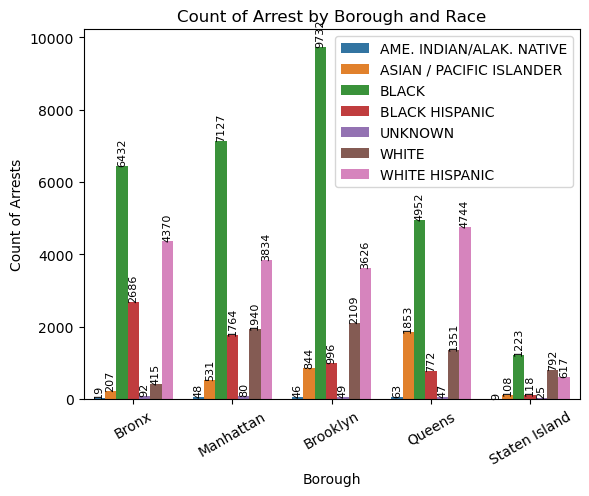

In [19]:
# plotting bar graph
ax = sns.barplot(x='Arrest_Boro', y='Arrest_Count', hue='PERP_RACE', data=df_all)


plt.title('Count of Arrest by Borough and Race')
plt.xlabel('Borough')
plt.ylabel('Count of Arrests')
plt. xticks(rotation=30)
plt.legend(loc='upper right')
#plt.figure(figsize=(10,100))

#used  for loop to iterate through each ax.containers and label the bars
for i in ax.containers:
    ax.bar_label(i, fontsize=8, rotation=90)
    
    
    


In [20]:
# created dataframe for arrest by borough
df_total_arrests = df.groupby(['ARREST_BORO'])['ARREST_KEY'].count().reset_index()

#renaming column 
df_total_arrests.rename(columns = {'ARREST_KEY':'Arrest_Count'}, inplace = True)

df_total_arrests



,ARREST_BORO,Arrest_Count
0,Bronx,14221
1,Brooklyn,17402
2,Manhattan,15324
3,Queens,13782
4,Staten Island,2892


In [21]:
#add column for population for each boro --0 Data is from citypopulation.com as of 2022 (https://www.citypopulation.de/en/usa/newyorkcity/)
df_total_arrests.insert(2, "Population", [1356476, 2561225,1597451 , 2252196, 490687], True)
df_total_arrests


,ARREST_BORO,Arrest_Count,Population
0,Bronx,14221,1356476
1,Brooklyn,17402,2561225
2,Manhattan,15324,1597451
3,Queens,13782,2252196
4,Staten Island,2892,490687


In [22]:
#add new column to calculate Per capita = number of arrest/ population
df_total_arrests['Arrest Rate Per Capita'] = df_total_arrests['Arrest_Count']/df_total_arrests['Population']
#add new column to calculate arrests per 100000 people for each borough
df_total_arrests['Arrest Rate Per 100,000 people'] = df_total_arrests['Arrest_Count']/df_total_arrests['Population']*100000
df_total_arrests

,ARREST_BORO,Arrest_Count,Population,Arrest Rate Per Capita,"Arrest Rate Per 100,000 people"
0,Bronx,14221,1356476,0.010484,1048.378298
1,Brooklyn,17402,2561225,0.006794,679.440502
2,Manhattan,15324,1597451,0.009593,959.278250
3,Queens,13782,2252196,0.006119,611.936084
4,Staten Island,2892,490687,0.005894,589.377750


## Conclusion: 
In conclusion, Bronx had the highest count of arrest rate per 100,000 people with about 1048 arrests, followed by Manhattan (959) and Queens (612). Looking closer at the arrests by race, Black had the highest count of arrests, followed by Black Hispanics. Some data bias that I found was that there were a lot data that was Unknown/Not Available/Not Reported - for instance looking the LAW_CAT_CD column, there was 404 data points missing.  